In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Understanding the Data

x and y positions of 33 keyppints covering the complete human body
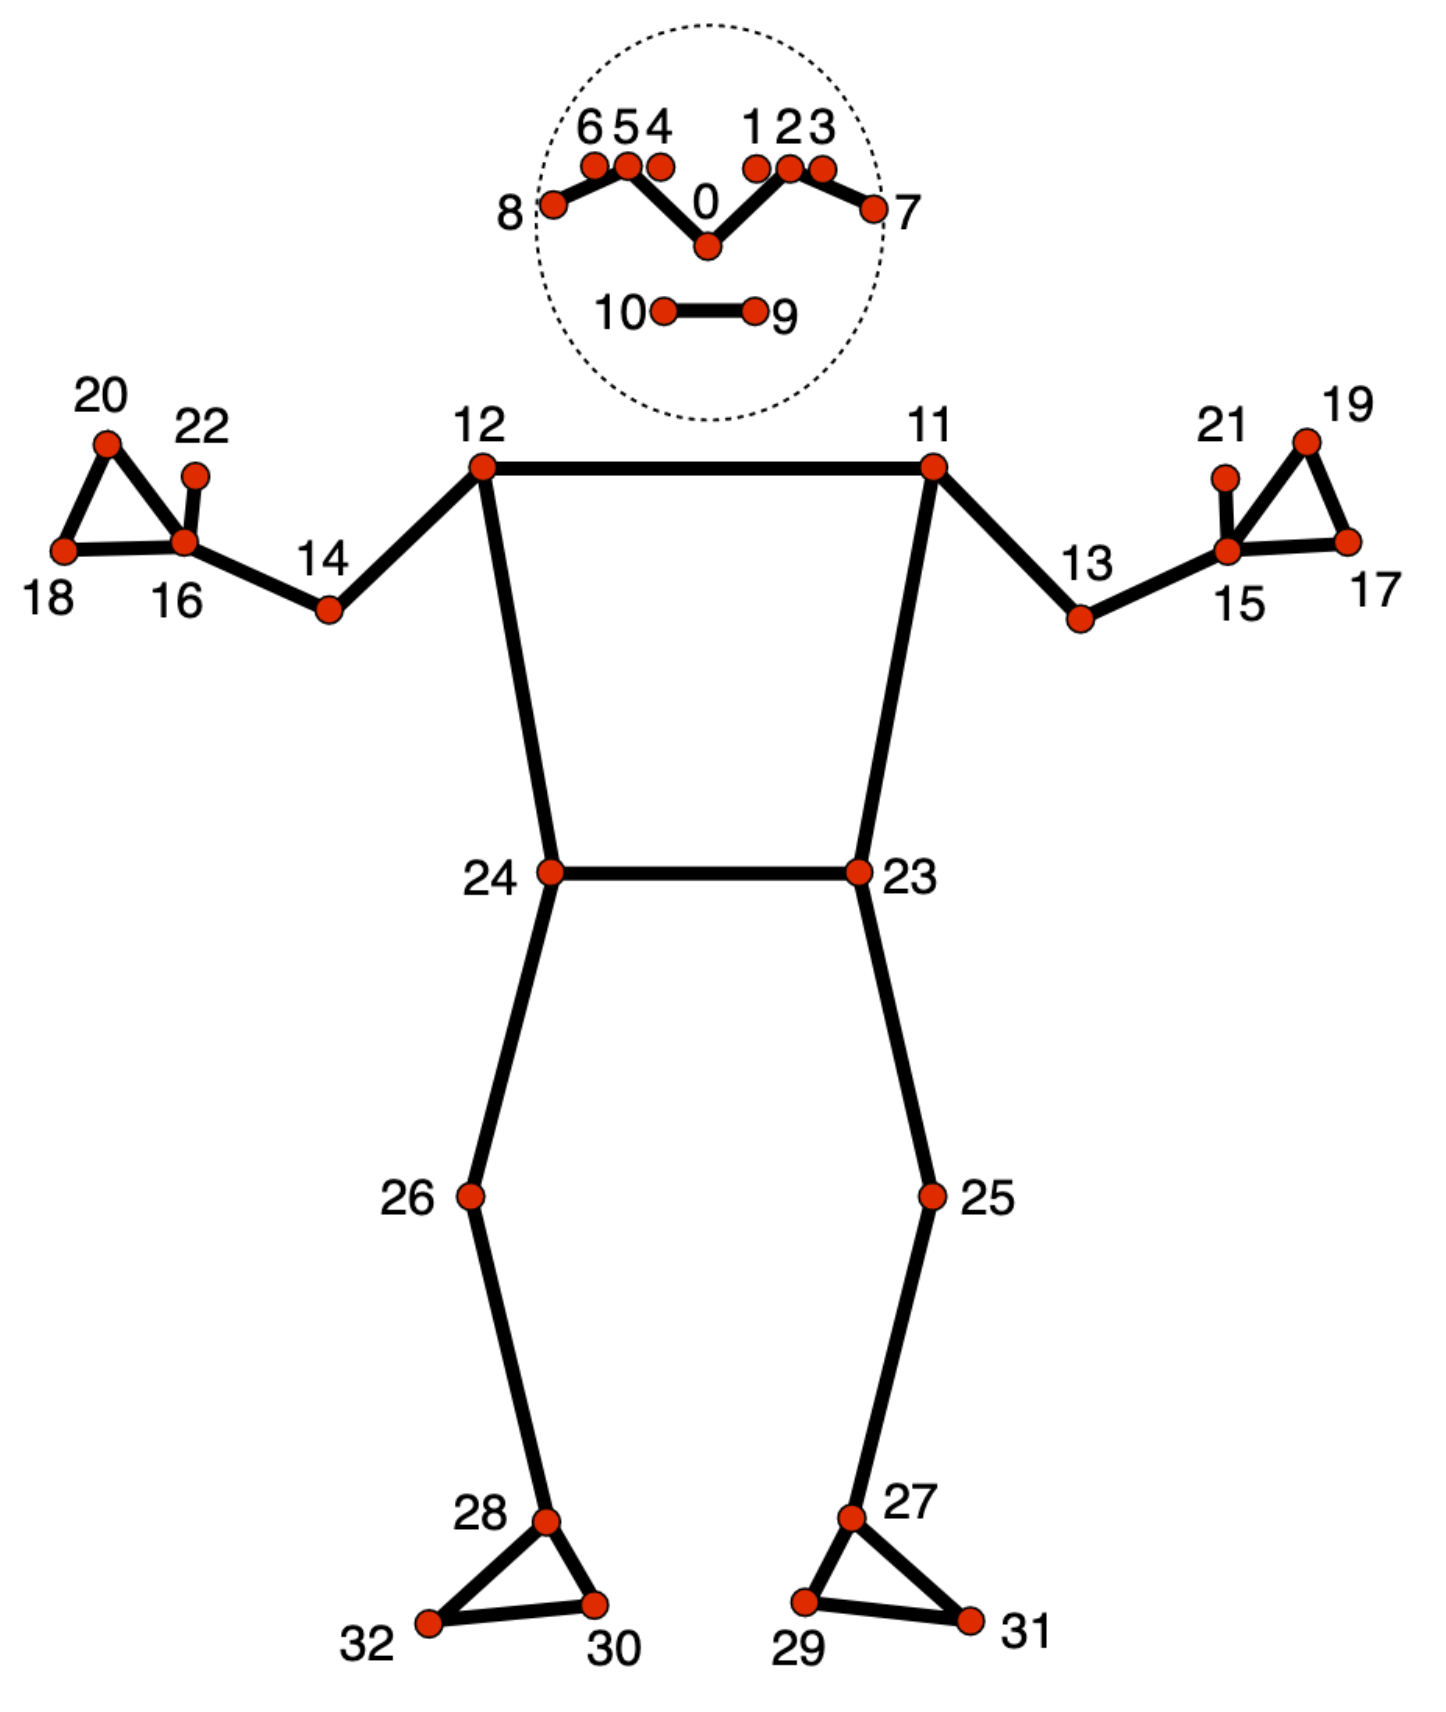

The keypoints positions are coordinates in meters, with the midpoint of the hips as the origin.

# First Classification Problem

In [16]:
#Load Data from First Classification Problem
# Load one
data = pd.read_pickle('../Data/Xtrain1.pkl')
Y_train = np.load('../Data/Ytrain1.npy')

# Print first lines
data.head()

,Patient_Id,Skeleton_Features
158,8,"[0.01672805172463768, -0.5662699523188407, 0.0..."
500,12,"[0.03123780159177354, -0.5718956396, 0.0479631..."
396,6,"[0.023674554394231464, -0.5588386275217391, 0...."
155,8,"[0.009414516641025642, -0.5693782186153847, 0...."
321,3,"[0.015847331331651126, -0.5660038876666666, 0...."


In [17]:
#Check shapes
print(data.shape)
print(Y_train.shape)

(700, 2)
(700,)


In [18]:
#Get features and built X_train
X_train = np.stack(data['Skeleton_Features'])

print(X_train.shape) #700 sequences x (33 keypoints x mean of 2 dimensions + 33 keypoints x std of 2 dimensions) [Kp0x_mean, Kp0y_mean,....,Kp32x_mean,Kp32y_mean,Kp0x_std,Kp0y_std,...,Kp32x_std,Kp32y_std]

(700, 132)


# Second Classification Problem

In [19]:
#Load Data from Second Classification Problem
# Load one
data2 = pd.read_pickle('../Data/Xtrain2.pkl')
Y_train2 = np.load('../Data/Ytrain2.npy')

# Print first lines
data2.head()

,Patient_Id,Exercise_Id,Skeleton_Sequence
0,1,E1,"[[-0.003837984, -0.579281688, 0.010213038, -0...."
1,1,E1,"[[-0.006423568, -0.590631604, 0.007034406, -0...."
2,1,E1,"[[0.010297444, -0.57850194, 0.023338385, -0.60..."
3,1,E1,"[[-0.039400429, -0.541313469, -0.023210142, -0..."
4,2,E1,"[[0.002523404, -0.574687421, 0.021674899, -0.5..."


In [20]:
#Check shapes
print(data2.shape)
print(Y_train2.shape)

(446, 3)
(14,)


In [21]:
#Let's inspect one patient
Pat1 = data2[data2['Patient_Id'] == 1]

Pat1

,Patient_Id,Exercise_Id,Skeleton_Sequence
0,1,E1,"[[-0.003837984, -0.579281688, 0.010213038, -0...."
1,1,E1,"[[-0.006423568, -0.590631604, 0.007034406, -0...."
2,1,E1,"[[0.010297444, -0.57850194, 0.023338385, -0.60..."
3,1,E1,"[[-0.039400429, -0.541313469, -0.023210142, -0..."
55,1,E2,"[[-0.024749791, -0.535250902, -0.014056169, -0..."
56,1,E2,"[[0.000860671, -0.560884118, 0.00931603, -0.58..."
112,1,E3,"[[0.0132554657757282, -0.549277842, 0.02767245..."
113,1,E3,"[[-0.009194537, -0.536099017, 0.00539052, -0.5..."
114,1,E3,"[[-0.010701327, -0.522298098, 0.001951107, -0...."
115,1,E3,"[[-0.000216575, -0.528292716, 0.01272783894091..."


In [22]:
#Let's collect one sequence
seq = Pat1.iloc[0]['Skeleton_Sequence']

print(seq)

print()

print(seq[0,:]) #(255 time steps x 33 keypoints and two dimensions - [Kp0x, Kp0y,....,Kp32x,Kp32y])

[[-0.00383798 -0.57928169  0.01021304 ...  0.66410762 -0.2182001
   0.61235523]
 [-0.00395422 -0.58265036  0.01003036 ...  0.65922165 -0.22714403
   0.60195237]
 [-0.00104324 -0.58562577  0.01368684 ...  0.65811205 -0.21850348
   0.60742044]
 ...
 [ 0.00328255 -0.57164753  0.01778917 ...  0.65974248 -0.22307672
   0.59534788]
 [ 0.003978   -0.5734387   0.01813321 ...  0.65311491 -0.22001499
   0.60331267]
 [ 0.00806434 -0.57116133  0.02167964 ...  0.65932    -0.22020824
   0.6051982 ]]

[-3.83798400e-03 -5.79281688e-01  1.02130380e-02 -6.03365481e-01
  1.46907010e-02 -6.02224231e-01  1.21108160e-02 -6.02247417e-01
 -1.13773300e-02 -6.05828226e-01 -8.19435700e-03 -6.04369819e-01
 -2.47284600e-03 -5.95960736e-01  7.25424510e-02 -5.77429533e-01
 -6.13183160e-02 -5.29787838e-01  3.62115870e-02 -5.67890882e-01
  5.42236300e-03 -5.30614913e-01  1.92643166e-01 -4.11808223e-01
 -1.46626949e-01 -4.67117280e-01  2.55298257e-01 -2.07626253e-01
 -2.54153132e-01 -2.08918810e-01  1.84073254e-01 -2.6

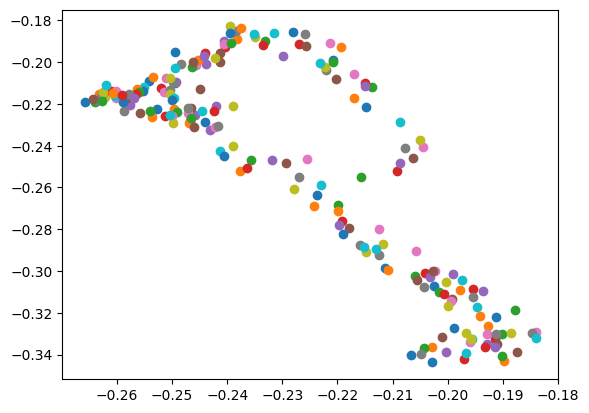

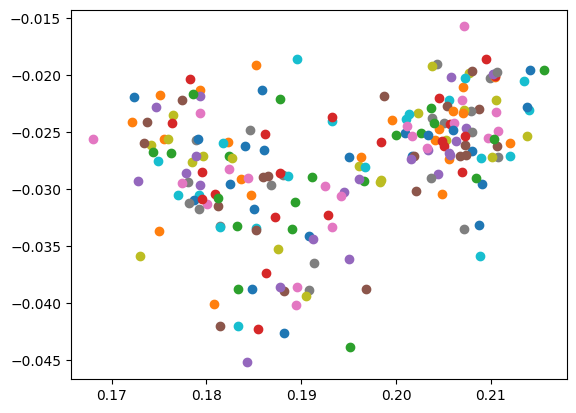

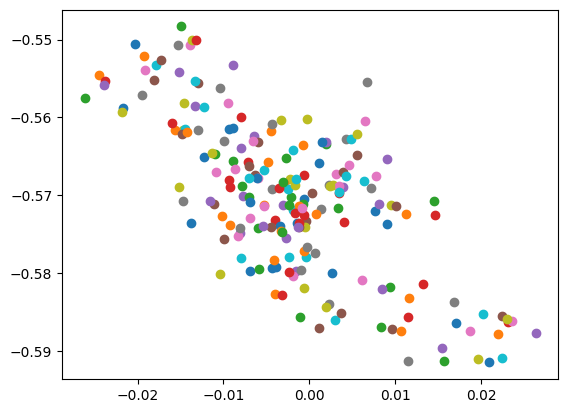

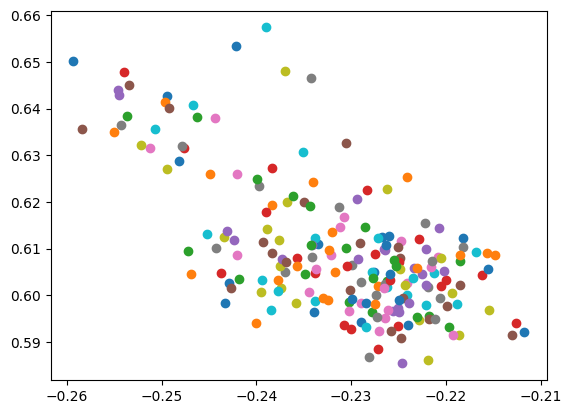

In [23]:
#Time evolution of different keypoints
i = 28 #KP 15
for t in range(seq.shape[0]):
  x = seq[t,i]
  y = seq[t,i+1]

  plt.scatter(x,y)

plt.show()

i = 30 #KP 16
for t in range(seq.shape[0]):
  x = seq[t,i]
  y = seq[t,i+1]

  plt.scatter(x,y)

plt.show()

i = 0 #Kp 0
for t in range(seq.shape[0]):
  x = seq[t,i]
  y = seq[t,i+1]

  plt.scatter(x,y)

plt.show()

i = 64 #Kp 32
for t in range(seq.shape[0]):
  x = seq[t,i]
  y = seq[t,i+1]

  plt.scatter(x,y)

plt.show()

     Patient_Id Exercise_Id                                  Skeleton_Sequence
112           1          E3  [[0.0132554657757282, -0.549277842, 0.02767245...
113           1          E3  [[-0.009194537, -0.536099017, 0.00539052, -0.5...
114           1          E3  [[-0.010701327, -0.522298098, 0.001951107, -0....
115           1          E3  [[-0.000216575, -0.528292716, 0.01272783894091...
116           1          E3  [[-0.009468819, -0.487884074, 0.00340784, -0.5...
117           1          E3  [[-0.004522046, -0.555533469, 0.009770026, -0....
118           1          E3  [[0.010138729, -0.548822522, 0.023060377687215...
119           1          E3  [[-0.000236052, -0.512081683, 0.01237655617296...
(147, 66)


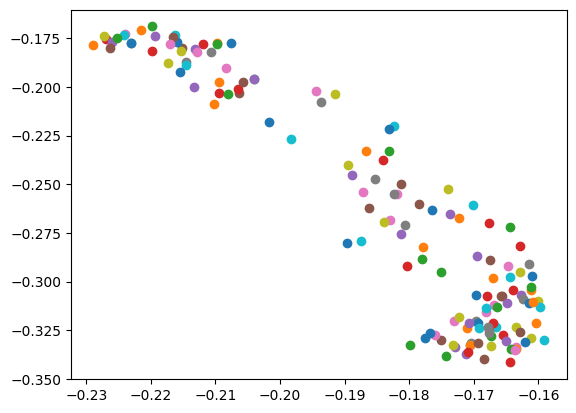

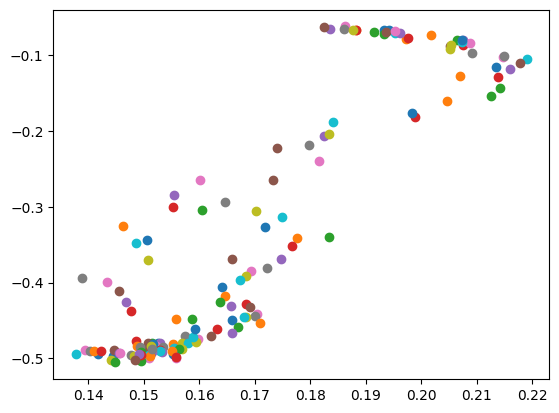

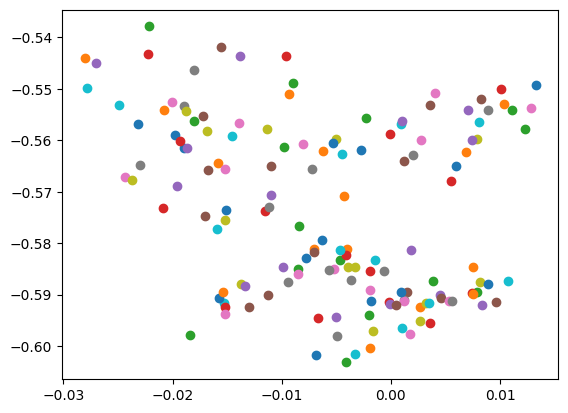

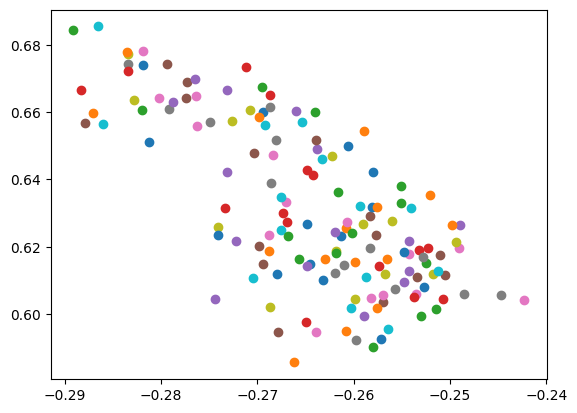

In [24]:
#For another type of exercise

E3_Pat1 = Pat1[Pat1['Exercise_Id']=='E3']

print(E3_Pat1)

seq = E3_Pat1.iloc[0]['Skeleton_Sequence']

print(seq.shape)

i = 28 #KP 15
for t in range(seq.shape[0]):
  x = seq[t,i]
  y = seq[t,i+1]

  plt.scatter(x,y)

plt.show()

i = 30 #KP 16
for t in range(seq.shape[0]):
  x = seq[t,i]
  y = seq[t,i+1]

  plt.scatter(x,y)

plt.show()

i = 0 #Kp 0
for t in range(seq.shape[0]):
  x = seq[t,i]
  y = seq[t,i+1]

  plt.scatter(x,y)

plt.show()

i = 64 #Kp 32
for t in range(seq.shape[0]):
  x = seq[t,i]
  y = seq[t,i+1]

  plt.scatter(x,y)

plt.show()